In [63]:
import pandas as pd
import requests
from pandas import json_normalize

headers = {
  "User-Agent": "Mozilla/5.0"
}

url = "https://query1.finance.yahoo.com/v8/finance/chart/TSLA?period1=1657237004&period2=1751931404&interval=1d&events=history"
response = requests.get(url,headers=headers)
data = response.json()

result = data["chart"]["result"][0]

quote = result["indicators"]["quote"][0]
symbol = result["meta"]["symbol"]
timestamp = result["timestamp"]
close_list = quote["close"]
open_list = quote["open"]
low_list = quote["low"]
high_list = quote["high"]
volume_list = quote["volume"]



df = pd.DataFrame({
    'timestamp': timestamp,
    'open': quote['open'],
    'high': quote['high'],
    'low': quote['low'],
    'close': quote['close'],
    'volume': quote['volume']
})

# 加入股票代碼
df['symbol'] = symbol

# 將 timestamp 轉為可讀日期
df['date'] = pd.to_datetime(df['timestamp'], unit='s').dt.date

# 重新排序欄位
df = df[['symbol', 'date', 'open', 'high', 'low', 'close', 'volume']]

# 顯示前幾筆
print(df.head())



# print(symbol)
# print(timestamp)
# print(close_list)
# print(open_list )
# print(low_list)
# print(high_list)
# print(volume_list)




  symbol        date        open        high         low       close  \
0   TSLA  2022-07-07  233.919998  245.363327  232.210007  244.543335   
1   TSLA  2022-07-08  242.333328  254.979996  241.160004  250.763336   
2   TSLA  2022-07-11  252.103333  253.063339  233.626663  234.343338   
3   TSLA  2022-07-12  236.846664  239.773331  228.369995  233.070007   
4   TSLA  2022-07-13  225.500000  242.059998  225.033340  237.039993   

      volume  
0   81930600  
1  101854200  
2   99241200  
3   87930900  
4   97954500  


In [1]:
import pandas as pd
import requests

symbols = ['1299.HK', '1788.HK', '9988.HK', '0175.HK', '2800.HK', '3033.HK', '1810.HK', '3690.HK', \
 '0700.HK', '0981.HK', '9868.HK', '0939.HK', '9926.HK', '2318.HK', '1211.HK', '1024.HK', '9992.HK', \
 '0241.HK', '0388.HK', '1177.HK','TSLA','CRCL','NVDA','PLTR','TSM','AAPL','SQQQ','RGC','HOOD','BIDU', \
 'TEM','TSLL','BBAI','CRWV','WOLF','PROK','AMD','KC','INTC','TQQQ']

all_data = []

headers = {
    "User-Agent": "Mozilla/5.0"
}

# 設定時間區間（這邊是從2022到2025）
period1 = 1657237004
period2 = 1753679645
interval = '1d'

for symbol in symbols:
    url = f"https://query1.finance.yahoo.com/v8/finance/chart/{symbol}?period1={period1}&period2={period2}&interval={interval}&events=history"
    
    response = requests.get(url, headers=headers)
    data = response.json()
    
    try:
        result = data["chart"]["result"][0]
        quote = result["indicators"]["quote"][0]
        timestamp = result["timestamp"]
        print(len(quote['open']))
        print(len(quote['high']))
        print(len(quote['low']))
        print(len(quote['close']))
        print(len(quote['volume']))
        df = pd.DataFrame({
            'timestamp': timestamp,
            'open': quote['open'],
            'high': quote['high'],
            'low': quote['low'],
            'close': quote['close'],
            'volume': quote['volume']
        })

        df['code'] = symbol
        df['date'] = pd.to_datetime(df['timestamp'], unit='s').dt.strftime('%Y-%m-%d')
        df = df[['code', 'date', 'open', 'high', 'low', 'close', 'volume']]
        
        
        all_data.append(df)

    except Exception as e:
        print(f"⚠️ 無法處理 {code}：{e}")

# 合併所有股票的表格
merged_df = pd.concat(all_data, ignore_index=True)

# 顯示前幾筆
# print(merged_df.head())

merged_df.to_csv('stock_prices_all.csv', index=False)

750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
750
766
766
766
766
766
36
36
36
36
36
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
278
278
278
278
278
743
743
743
743
743
766
766
766
766
766
82
82
82
82
82
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766
766


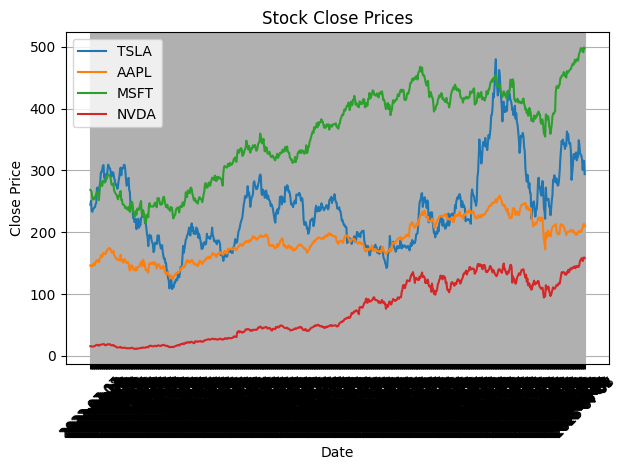

In [68]:
import matplotlib.pyplot as plt

# 選擇要畫圖的 symbol（也可以畫全部）
selected_symbols = ['TSLA', 'AAPL', 'MSFT','NVDA']

# 過濾資料
for symbol in selected_symbols:
    symbol_df = merged_df[merged_df['symbol'] == symbol]
    plt.plot(symbol_df['date'], symbol_df['close'], label=symbol)

plt.title('Stock Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [71]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = go.Figure()

# 多支股票一張圖
for symbol in ['TSLA']:
    symbol_df = merged_df[merged_df['symbol'] == symbol]
    fig.add_trace(go.Scatter(
        x=symbol_df['date'],
        y=symbol_df['close'],
        mode='lines',
        name=symbol
    ))

fig.update_layout(
    title='Stock Close Prices (Interactive)',
    xaxis_title='Date',
    yaxis_title='Close Price',
    hovermode='x unified',
    template='plotly_dark',
    height=600
)

fig.show()

In [72]:
import plotly.graph_objects as go

# 選擇你要畫的股票，例如 TSLA
symbol = 'TSLA'
symbol_df = merged_df[merged_df['symbol'] == symbol]

# 用 plotly 的 go.Candlestick 畫蠟燭圖
fig = go.Figure(data=[
    go.Candlestick(
        x=symbol_df['date'],
        open=symbol_df['open'],
        high=symbol_df['high'],
        low=symbol_df['low'],
        close=symbol_df['close'],
        name=symbol
    )
])

fig.update_layout(
    title=f'Candlestick Chart - {symbol}',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,
    template='plotly_white',
    height=600
)

fig.show()
